In [1]:
#!pip install kaggle

# DL kaggle.json

In [2]:
# Import Data
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!cp kaggle.json ~/.kaggle/

In [ ]:
#!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d husainsb/lendingclub-issued-loans -p /content

100% 179M/179M [00:08<00:00, 27.2MB/s]
100% 179M/179M [00:08<00:00, 21.1MB/s]


In [5]:
import zipfile

with zipfile.ZipFile('/content/lendingclub-issued-loans.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/lendingclub-issued-loans')

# Clean

In [6]:
import pandas as pd
import numpy as np
import missingno as msno

In [7]:
df = pd.read_csv('/content/lendingclub-issued-loans/lc_loan.csv', low_memory=False)

In [8]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(887379, 74)

<Axes: >

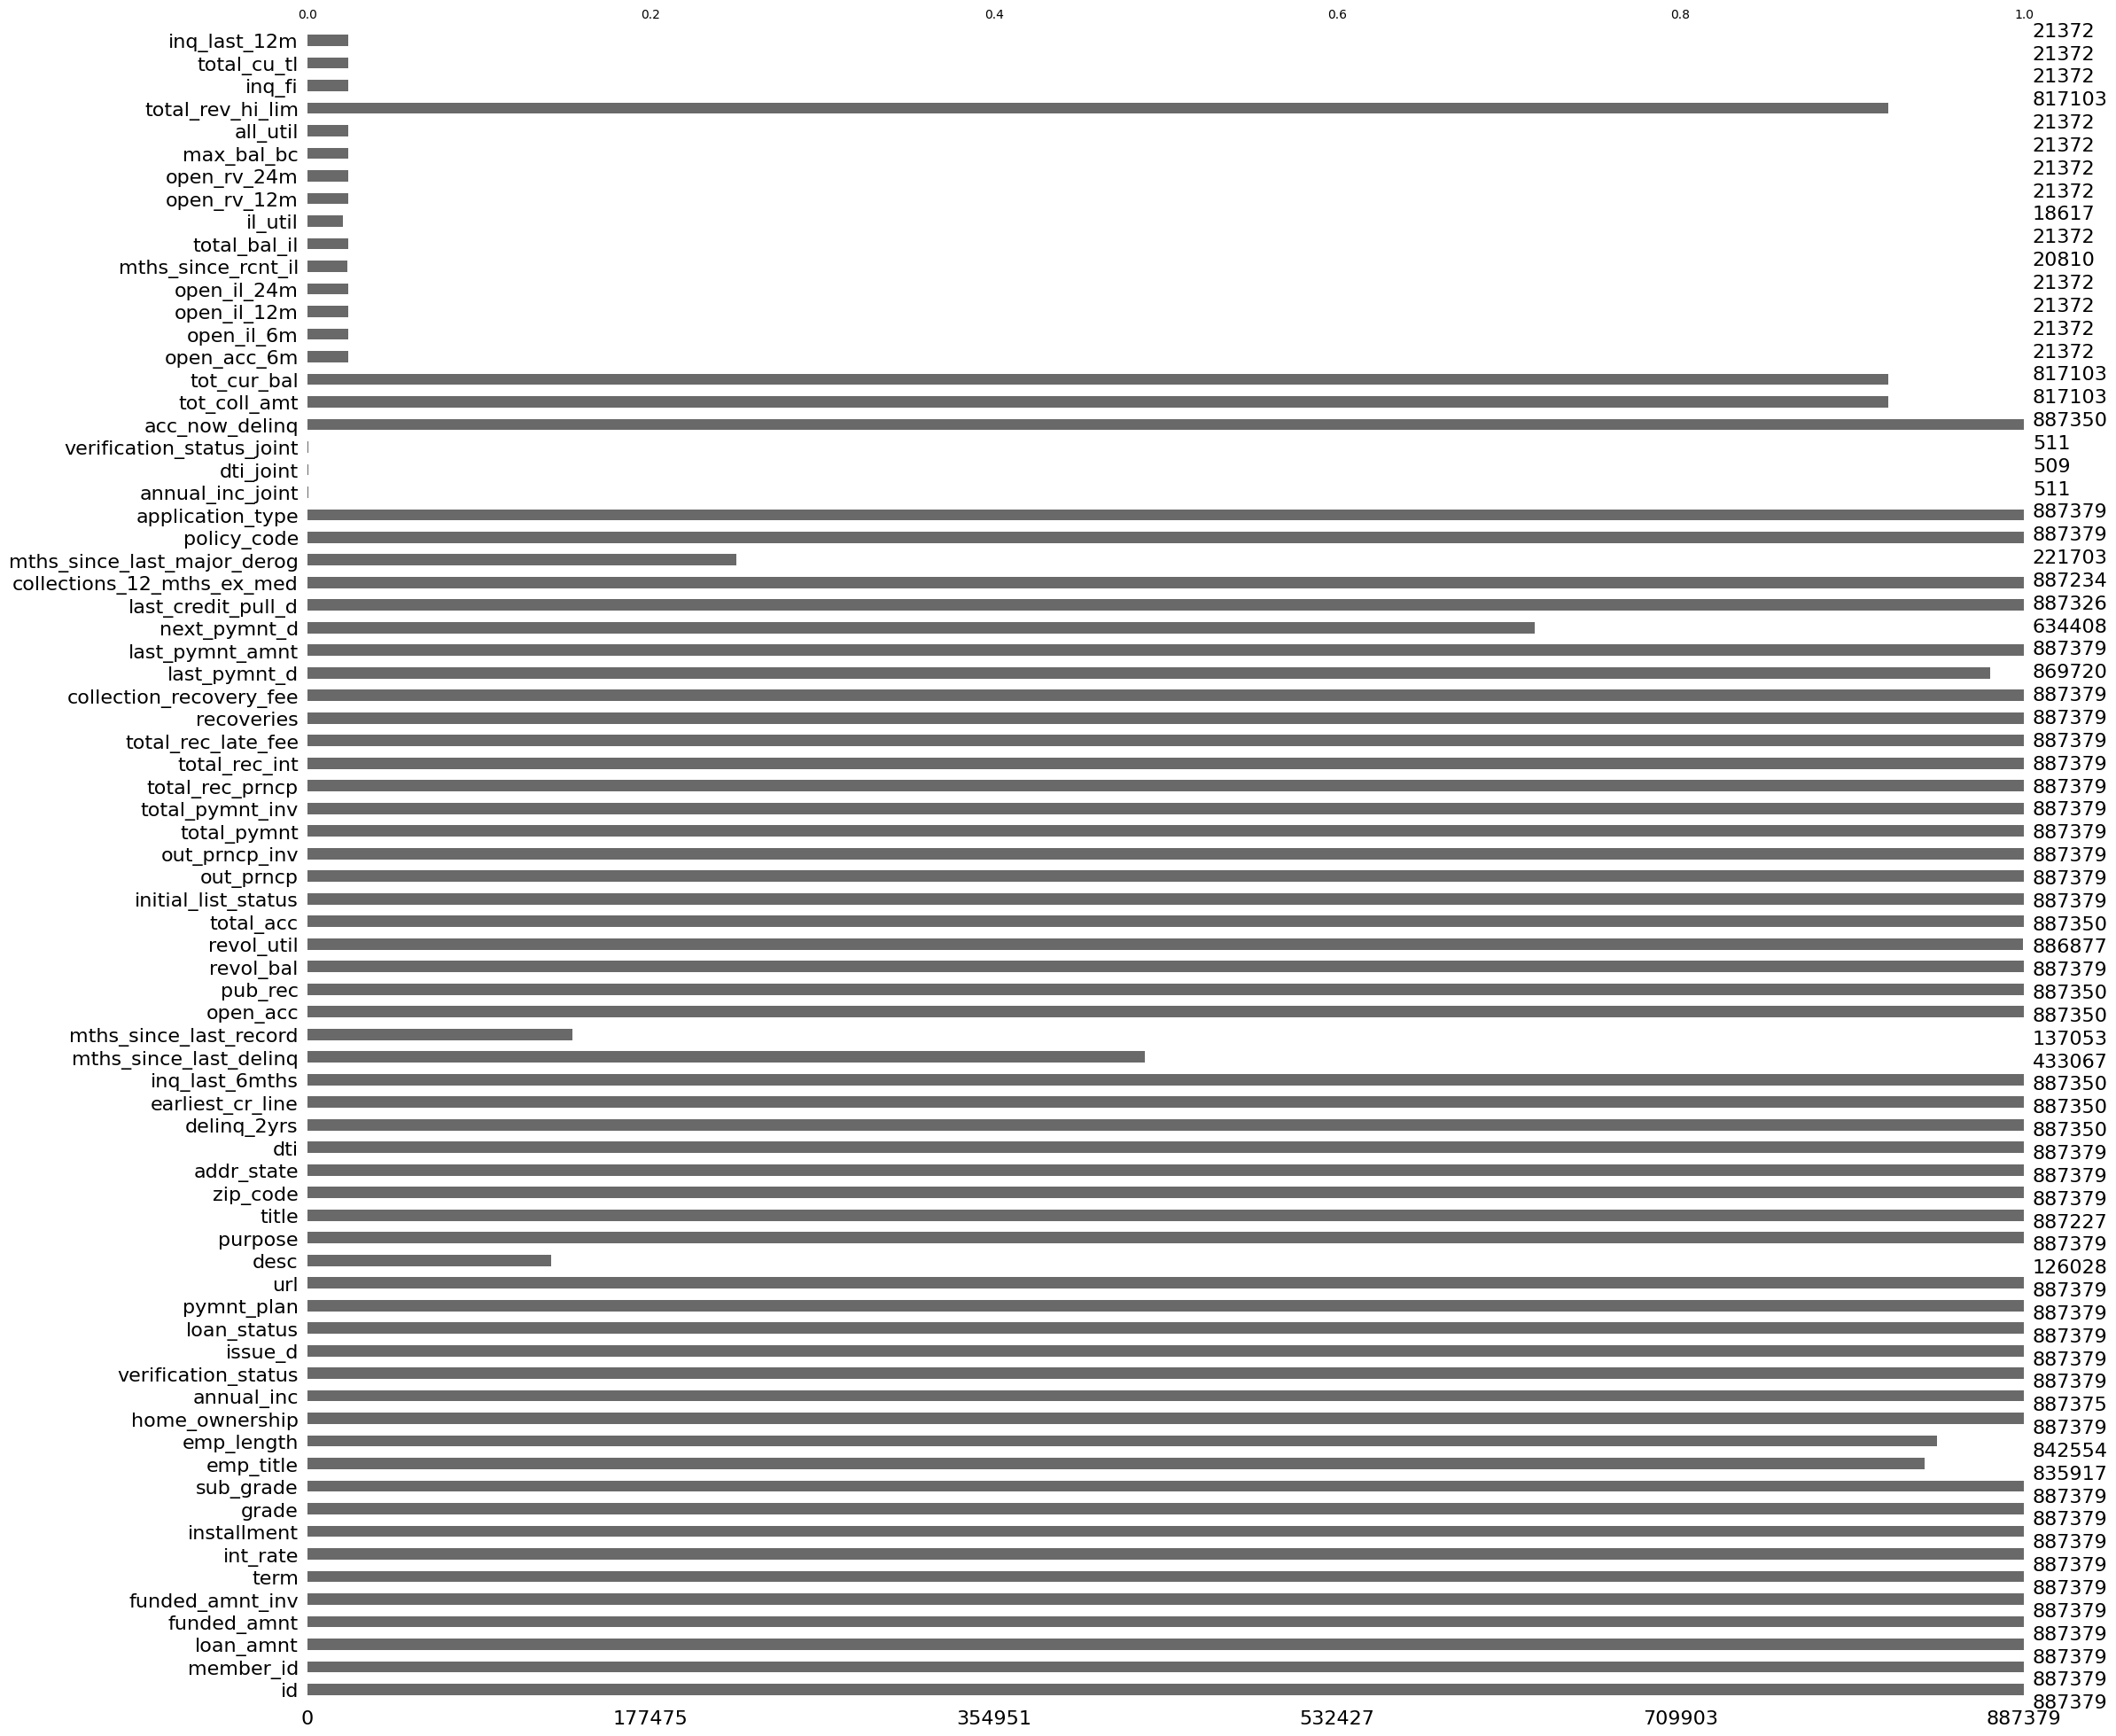

In [10]:
msno.bar(df)

In [11]:
# Calculate the percentage of missing values in df_read
percentage_missing = df.isnull().sum() / len(df) * 100

# Create a new DataFrame with columns from df and index set to None
new_df = pd.DataFrame(columns=df.columns, index=None)
pd.set_option('display.max_columns', None)

# Creating new Percentage index
new_df.loc['Percentage'] = percentage_missing.values
new_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.799326,5.051393,0.0,0.000451,0.0,0.0,0.0,0.0,0.0,85.797726,0.0,0.017129,0.0,0.0,0.0,0.003268,0.003268,0.003268,51.197065,84.555303,0.003268,0.003268,0.0,0.056571,0.003268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.990018,0.0,28.507661,0.005973,0.01634,75.015974,0.0,0.0,99.942415,99.94264,99.942415,0.003268,7.919502,7.919502,97.591559,97.591559,97.591559,97.591559,97.654892,97.591559,97.902024,97.591559,97.591559,97.591559,97.591559,7.919502,97.591559,97.591559,97.591559


In [12]:
# Keep features with less than 20% missing values
features_to_keep = df.columns[ (df.isnull().sum()/len(df))*100 <20 ].tolist()

print('Features at start:',len(df.columns))
print('Features after filtering:',len(features_to_keep))

Features at start: 74
Features after filtering: 52


In [13]:
df = df[features_to_keep]
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [14]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature,'---',df[feature].isnull().sum(),'Missing values --- type:',df[feature].dtype)

emp_title --- 51462 Missing values --- type: object
emp_length --- 44825 Missing values --- type: object
annual_inc --- 4 Missing values --- type: float64
title --- 152 Missing values --- type: object
delinq_2yrs --- 29 Missing values --- type: float64
earliest_cr_line --- 29 Missing values --- type: object
inq_last_6mths --- 29 Missing values --- type: float64
open_acc --- 29 Missing values --- type: float64
pub_rec --- 29 Missing values --- type: float64
revol_util --- 502 Missing values --- type: float64
total_acc --- 29 Missing values --- type: float64
last_pymnt_d --- 17659 Missing values --- type: object
last_credit_pull_d --- 53 Missing values --- type: object
collections_12_mths_ex_med --- 145 Missing values --- type: float64
acc_now_delinq --- 29 Missing values --- type: float64
tot_coll_amt --- 70276 Missing values --- type: float64
tot_cur_bal --- 70276 Missing values --- type: float64
total_rev_hi_lim --- 70276 Missing values --- type: float64


In [15]:
# DEAL WITH MISSING VALUES

df['emp_title'] = df['emp_title'].fillna(df['emp_title'].mode()[0])
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].mean())
df['title'] = df['title'].fillna(df['title'].mode()[0])
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(df['delinq_2yrs'].mean())
df['earliest_cr_line'] = df['earliest_cr_line'].fillna(df['earliest_cr_line'].mode()[0])
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(df['inq_last_6mths'].mean())
df['open_acc'] = df['open_acc'].fillna(df['open_acc'].mean())
df['pub_rec'] = df['pub_rec'].fillna(df['pub_rec'].mean())
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())
df['total_acc'] = df['total_acc'].fillna(df['total_acc'].mean())
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0])
df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].mode()[0])
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].mean())
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(df['acc_now_delinq'].mean())
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(df['tot_coll_amt'].mean())
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].mean())
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].mean())


In [16]:
# To keep only features with non null values (34)

#df = df.dropna(axis=1)

In [16]:
df.shape

(887379, 52)

In [17]:
df = df.drop_duplicates()

In [18]:
df.shape

(887379, 52)

In [19]:
df["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [20]:
target_mapping = {'Late (31-120 days)':'Default','Late (16-30 days)':'Default','Default':'Default','Issued':'Paid','Current':'Paid','Fully Paid':'Paid','Charged Off':'Default','In Grace Period':'Paid','Does not meet the credit policy. Status:Fully Paid':'Paid','Does not meet the credit policy. Status:Charged Off':'Default'}

df['Target'] = df['loan_status'].map(target_mapping)

In [21]:
df['Target'].value_counts()

Paid       826203
Default     61176
Name: Target, dtype: int64

In [22]:
df = df.drop('loan_status',axis=1)

# EDA

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

<ipython-input-24-dd68bdc1d8b8>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


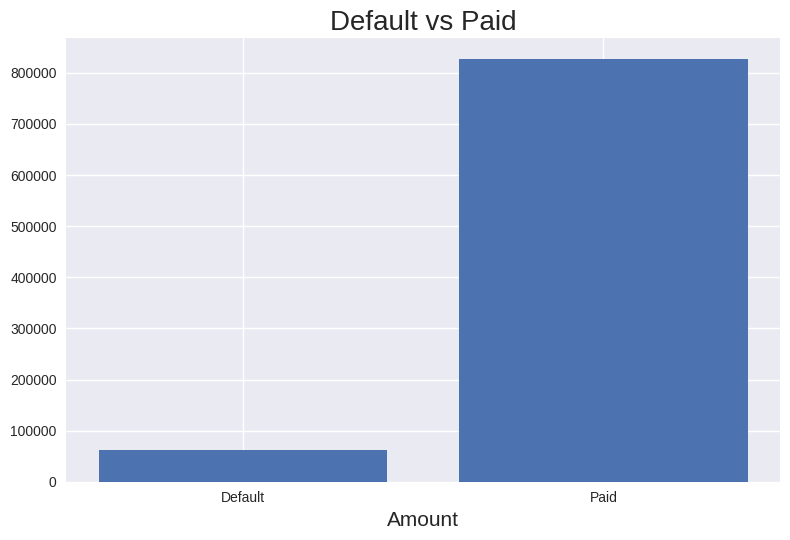

In [24]:
# Data distribution

Defaulters_index = df['Target'].value_counts().index.tolist()
Defaulters_amount = df['Target'].value_counts().tolist()

Defaulters_index.reverse()
Defaulters_amount.reverse()

plt.style.use('seaborn')

plt.bar(Defaulters_index[-15:],Defaulters_amount[-15:])

plt.title('Default vs Paid',fontsize=20)
plt.xlabel('Amount',fontsize=15)
plt.xticks(Defaulters_index)
plt.tight_layout()

plt.show()

# Process

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

In [26]:
df_model = df.copy()

del df_model['id']
del df_model['member_id']

In [27]:
categorical_features = [features for features in df_model.columns if df_model[features].dtype == "object"]
numerical_features = [features for features in df_model.columns if features not in categorical_features]

print('Categorical Features:',categorical_features)
print('Numerical Features:',numerical_features)

Categorical Features: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'Target']
Numerical Features: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [28]:
df_model.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Target
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,225.70261,139458.189336,32068.620045,Paid
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,225.70261,139458.189336,32068.620045,Default


In [29]:
encoder = LabelEncoder()
hot_encoder = OneHotEncoder()


#df_model = pd.get_dummies(data=df_model, columns=categorical_features)

for feature in df_model[categorical_features]:
  df_model[feature] = encoder.fit_transform(df_model[feature])


In [31]:
df_model.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Target
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,228736,1,5,24000.0,2,21,0,21291,1,8843,809,3,27.65,0.0,263,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,40,171.62,41,0.0,1.0,0,0.0,225.70261,139458.189336,32068.620045,1
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,191489,10,5,30000.0,1,21,0,21255,0,49847,295,10,1.00,0.0,41,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,5,119.66,100,0.0,1.0,0,0.0,225.70261,139458.189336,32068.620045,0


In [30]:
X = df_model.drop(['Target'],axis=1)
y = df_model['Target']

In [31]:
import scipy
print(scipy.stats.skew(y))

-3.402850274399365


In [32]:
X.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,228736,1,5,24000.0,2,21,0,21291,1,8843,809,3,27.65,0.0,263,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,40,171.62,41,0.0,1.0,0,0.0,225.70261,139458.189336,32068.620045
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,191489,10,5,30000.0,1,21,0,21255,0,49847,295,10,1.00,0.0,41,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,5,119.66,100,0.0,1.0,0,0.0,225.70261,139458.189336,32068.620045


In [33]:
scaler = StandardScaler()

X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [34]:
X.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-1.156460,-1.155635,-1.152256,0,-0.592611,-1.121467,1,6,228736,1,5,-0.788703,2,21,0,21291,1,8843,809,3,0.552218,-0.364685,263,0.305857,-1.607694,-0.335533,-0.145932,1.201645,-1.373947,0,-0.989366,-0.989366,-0.215691,-0.215315,-0.114363,-0.426531,-0.097042,-0.112082,-0.077319,40,-0.415561,41,-0.107166,0.0,0,-0.064301,0.0,0.0,0.0
1,-1.452829,-1.452198,-1.445430,1,0.461735,-1.543440,2,13,191489,10,5,-0.695964,1,21,0,21255,0,49847,295,10,-0.998047,-0.364685,41,4.312143,-1.607694,-0.335533,-0.679268,-1.916589,-1.796231,0,-0.989366,-0.989366,-0.832158,-0.830023,-0.800135,-0.629790,-0.097042,0.173693,-0.059735,5,-0.426398,100,-0.107166,0.0,0,-0.064301,0.0,0.0,0.0


In [35]:
X.shape

(887379, 49)

In [36]:
y.value_counts()

1    826203
0     61176
Name: Target, dtype: int64

In [37]:
# TRAIN VAL TEST SPLIT
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,shuffle=True,stratify=y,random_state=42)

#print('X_train and y_train shapes before RUS :',X_train.shape,y_train.shape)


from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train,y_train = rus.fit_resample(X_train,y_train)

#print('X_train and y_train shapes after RUS :',X_train.shape,y_train.shape)


X_train_re,X_valid_re,y_train_re,y_valid_re = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,shuffle=True,random_state=42)


print("X_train.shape", X_train_re.shape, "y_train.shape", y_train_re.shape)
print("X_valid.shape", X_valid_re.shape, "y_valid.shape", y_valid_re.shape)
print("X_test.shape", X_test.shape," y_test.shape",y_test.shape)
#print("X_train_re.shape", X_train_re.shape, "y_train_re.shape", y_train_re.shape)

X_train.shape (109015, 49) y_train.shape (109015,)
X_valid.shape (12113, 49) y_valid.shape (12113,)
X_test.shape (8874, 49)  y_test.shape (8874,)


In [38]:
X_train.shape

(121128, 49)

In [39]:
y.value_counts()

1    826203
0     61176
Name: Target, dtype: int64

In [40]:
y_train_re.value_counts()

1    54508
0    54507
Name: Target, dtype: int64

In [ ]:
# TRAIN VAL TEST SPLIT

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

#print("X_norm_train.shape", X_train.shape, "y_train.shape", y_train.shape)
#print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

# Models (Before Feature Selection)

## Decision Tree (Final)

In [41]:
from sklearn.tree import DecisionTreeClassifier

train_acc_hist = []
cv_acc_hist = []
test_acc_hist = []


for i in range(1,12):

  dt = DecisionTreeClassifier(max_depth=i,random_state=42)
  dt.fit(X_train_re,y_train_re)

  y_pred_train_dt = dt.predict(X_train_re)
  y_pred_cv_dt = dt.predict (X_valid_re)
  y_pred_test_dt = dt.predict(X_test)


  print('----- Depth {} ---------'.format(i))
  print('F1 Train:', f1_score(y_train_re,y_pred_train_dt,average='macro'))
  print('F1 Validation:', f1_score(y_valid_re,y_pred_cv_dt,average='macro'))
  print('Train acc:', accuracy_score(y_train_re,y_pred_train_dt))
  print('Validation acc:', accuracy_score(y_valid_re,y_pred_cv_dt))

  train_acc_hist.append(f1_score(y_train_re,y_pred_train_dt,average='macro'))
  cv_acc_hist.append(f1_score(y_valid_re,y_pred_cv_dt,average='macro'))
  test_acc_hist.append(f1_score(y_test,y_pred_test_dt,average='macro'))


----- Depth 1 ---------
F1 Train: 0.6727805285531625
F1 Validation: 0.6704453932461589
Train acc: 0.7018667155895978
Validation acc: 0.7000743003384793
----- Depth 2 ---------
F1 Train: 0.8151056812876892
F1 Validation: 0.8136960112401289
Train acc: 0.8153006466999955
Validation acc: 0.813918930075126
----- Depth 3 ---------
F1 Train: 0.8706462628089651
F1 Validation: 0.8694828653495701
Train acc: 0.8717607668669449
Validation acc: 0.8706348551143399
----- Depth 4 ---------
F1 Train: 0.8790889915453063
F1 Validation: 0.8768924727451204
Train acc: 0.880300876026235
Validation acc: 0.8781474448939156
----- Depth 5 ---------
F1 Train: 0.9293621008250926
F1 Validation: 0.9265577944452046
Train acc: 0.929395037380177
Validation acc: 0.9266077767687608
----- Depth 6 ---------
F1 Train: 0.9464677367824144
F1 Validation: 0.9450559921882828
Train acc: 0.946502774847498
Validation acc: 0.9451003054569471
----- Depth 7 ---------
F1 Train: 0.9532957710723124
F1 Validation: 0.9514415281179796
Train

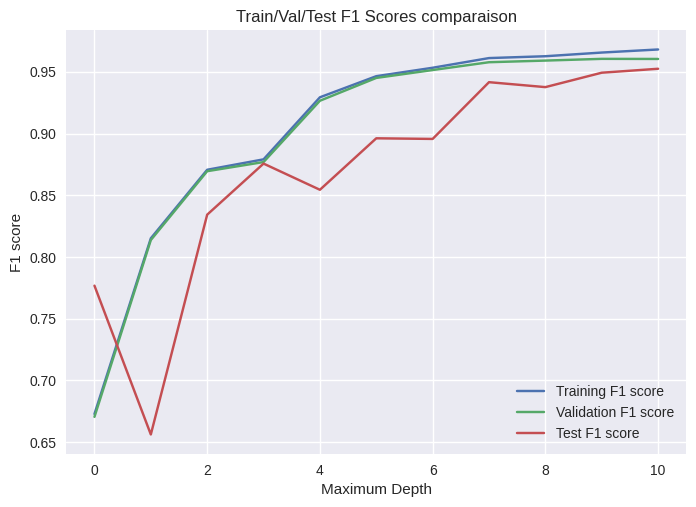

In [42]:
plt.plot(range(len(train_acc_hist)),train_acc_hist,label='Training F1 score')
plt.plot(range(len(cv_acc_hist)),cv_acc_hist,label='Validation F1 score')
plt.plot(range(len(test_acc_hist)),test_acc_hist,label='Test F1 score')
plt.xlabel('Maximum Depth')
plt.ylabel('F1 score')
plt.legend(loc='lower right')
plt.title('Train/Val/Test F1 Scores comparaison')

plt.show()

In [43]:
dt = DecisionTreeClassifier(max_depth=10,random_state=42)
dt.fit(X_train_re,y_train_re)

y_pred_train_dt = dt.predict(X_train_re)
y_pred_cv_dt = dt.predict (X_valid_re)

print('F1 Train:', f1_score(y_train_re,y_pred_train_dt,average='macro'))
print('F1 Validation:', f1_score(y_valid_re,y_pred_cv_dt,average='macro'))
print('--------------')
print('Train acc:', accuracy_score(y_train_re,y_pred_train_dt))
print('Validation acc:', accuracy_score(y_valid_re,y_pred_cv_dt))

F1 Train: 0.9656137069894533
F1 Validation: 0.9605080585737602
--------------
Train acc: 0.9656377562720726
Validation acc: 0.9605382646743168


In [44]:
y_pred_test_dt = dt.predict(X_test)

print('Test F1:', f1_score(y_test,y_pred_test_dt,average="macro"))
print('Test Acc:',accuracy_score(y_test,y_pred_test_dt))

Test F1: 0.949280602750503
Test Acc: 0.9865900383141762


In [45]:
y_test.value_counts()

1    8262
0     612
Name: Target, dtype: int64

In [46]:
# Confusion matrix and report

conf_mat = confusion_matrix(y_test,y_pred_test_dt)
print('Confusion Matrix:',conf_mat)
print('---------------')

report = classification_report(y_test,y_pred_test_dt)
print(report)

Confusion Matrix: [[ 572   40]
 [  79 8183]]
---------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       612
           1       1.00      0.99      0.99      8262

    accuracy                           0.99      8874
   macro avg       0.94      0.96      0.95      8874
weighted avg       0.99      0.99      0.99      8874



[Text(0.5, 31.222222222222214, 'Predictions'),
 Text(70.72222222222221, 0.5, 'Actual values')]

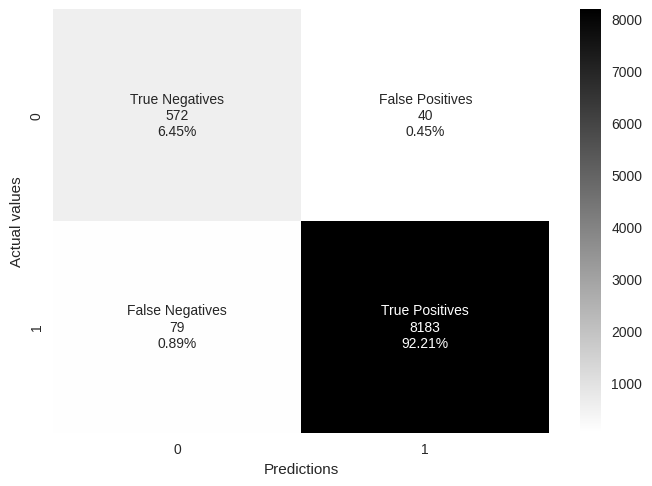

In [47]:
import seaborn as sns

group_names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat.flatten() / np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', cmap='binary')
ax.set(xlabel="Predictions",ylabel="Actual values")

## DFO (Final)

In [117]:
import numpy as np

# FITNESS FUNCTION (SPHERE FUNCTION)
# FITNESS FUNCTION TO CALCULATE THE ACCURACY OF SELECTED FEW FEATURE BASED ON THE VECTOR X

def f(x):

  # GET THE SUBSET OF FEATURE BASED ON THE FLY VECTOR VALUES (TAKE FEATURES IF VALUE>=0.5)
  features_list = []

  for i in range(len(x)):
    if x[i]>=0.5:
      features_list.append(X.columns[i])


  X_dfo = X.copy()
  y_dfo = y.copy()

  X_dfo = X_dfo.loc[:, features_list]

  # TRAIN VAL TEST SPLIT
  X_train,X_test,y_train,y_test=train_test_split(X_dfo,y_dfo,test_size=0.01,shuffle=True,stratify=y,random_state=42)


  from imblearn.under_sampling import RandomUnderSampler
  rus = RandomUnderSampler(random_state=42)
  X_train,y_train = rus.fit_resample(X_train,y_train)


  X_train_re,X_valid_re,y_train_re,y_valid_re = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,shuffle=True,random_state=42)


  ########################################### dt
  from sklearn.tree import DecisionTreeClassifier
  dt = DecisionTreeClassifier(max_depth=10,random_state=42)
  dt.fit(X_train_re,y_train_re)

  y_pred_test_dt = dt.predict (X_test)

  ################################################



  f1_validation = f1_score(y_test,y_pred_test_dt,average='macro')


  return f1_validation






N = 20					# POPULATION SIZE
D = X.shape[1]					# DIMENSIONALITY
delta = 0.01			# DISTURBANCE THRESHOLD
maxIterations = 20	# ITERATIONS ALLOWED
lowerB = [0]*D		# LOWER BOUND (IN ALL DIMENSIONS)
upperB = [1]*D		# UPPER BOUND (IN ALL DIMENSIONS)

historyy = []
feature_history = []



# INITIALISATION PHASE
XX = np.empty([N,D]) # EMPTY FLIES ARRAY OF SIZE: (N,D)
fitness = [None]*N  # EMPTY FITNESS ARRAY OF SIZE N

# INITIALISE FLIES WITHIN BOUNDS
for i in range(N):
	for d in range(D):
		XX[i,d] = np.random.uniform(lowerB[d], upperB[d])

# MAIN DFO LOOP
for itr in range (maxIterations):
	for i in range(N): # EVALUATION
		fitness[i] = f(XX[i,])
	s = np.argmax(fitness) # FIND BEST FLY

	#if (itr%10 == 0): # PRINT BEST FLY EVERY 10 ITERATIONS
	print ("Iteration:", itr, "\tBest fly index:", s,
			   "\tFitness value (Test F1 - KNN):", fitness[s])

	historyy.append(fitness[s])



  # Condition for counting elements between 0 and 1 (inclusive) that are greater than 0.5
	condition = lambda x: 0.5 <= x <= 1

	# Using list comprehension to count elements that satisfy the condition
	count = len([element for element in XX[s,] if condition(element)])

	feature_history.append(count)



	# TAKE EACH FLY INDIVIDUALLY
	for i in range(N):
		if i == s: continue # ELITIST STRATEGY

		# FIND BEST NEIGHBOUR
		left = (i-1)%N
		right = (i+1)%N
		bNeighbour = right if fitness[right]>fitness[left] else left

		for d in range(D): # UPDATE EACH DIMENSION SEPARATELY
			if (np.random.rand() < delta):
				XX[i,d] = np.random.uniform(lowerB[d], upperB[d])
				continue;

			u = np.random.rand()
			XX[i,d] = XX[bNeighbour,d] + u*(XX[s,d] - XX[i,d])

			# OUT OF BOUND CONTROL
			if XX[i,d] < lowerB[d] or XX[i,d] > upperB[d]:
				XX[i,d] = np.random.uniform(lowerB[d], upperB[d])

for i in range(N):
	fitness[i] = f(XX[i,]) # EVALUATION
s = np.argmax(fitness) # FIND BEST FLY

print("\nFinal best fitness:\t", fitness[s])
print("\nBest fly position:\n",  XX[s,])

Iteration: 0 	Best fly index: 9 	Fitness value (Test F1 - KNN): 0.9530822195002705
Iteration: 1 	Best fly index: 18 	Fitness value (Test F1 - KNN): 0.9583497091870701
Iteration: 2 	Best fly index: 3 	Fitness value (Test F1 - KNN): 0.9684904482479715
Iteration: 3 	Best fly index: 3 	Fitness value (Test F1 - KNN): 0.9684904482479715
Iteration: 4 	Best fly index: 4 	Fitness value (Test F1 - KNN): 0.9702199655827475
Iteration: 5 	Best fly index: 3 	Fitness value (Test F1 - KNN): 0.9706418939037131
Iteration: 6 	Best fly index: 3 	Fitness value (Test F1 - KNN): 0.9706418939037131
Iteration: 7 	Best fly index: 4 	Fitness value (Test F1 - KNN): 0.9706869559646691
Iteration: 8 	Best fly index: 7 	Fitness value (Test F1 - KNN): 0.9715315334823886
Iteration: 9 	Best fly index: 19 	Fitness value (Test F1 - KNN): 0.9723787005918376
Iteration: 10 	Best fly index: 19 	Fitness value (Test F1 - KNN): 0.9723787005918376
Iteration: 11 	Best fly index: 19 	Fitness value (Test F1 - KNN): 0.972378700591837

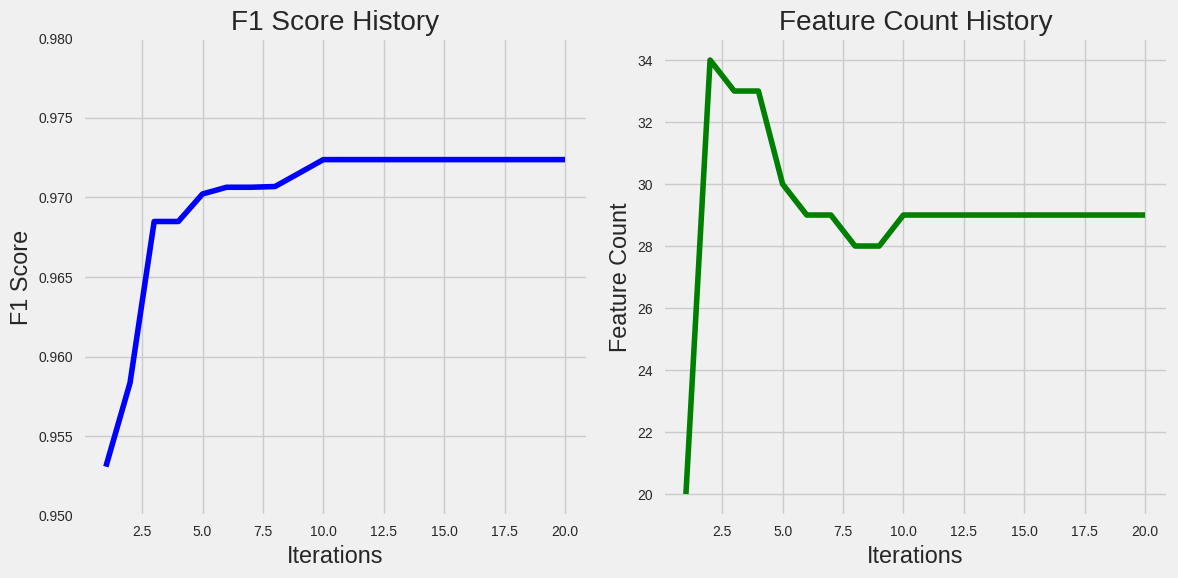

In [118]:
plt.style.use("fivethirtyeight")

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the accuracy data on the first subplot (ax1)
ax1.plot(range(1, len(historyy) + 1), historyy, color='blue', linestyle='-')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('F1 Score')
ax1.set_title('F1 Score History')
ax1.set_ylim(0.95, 0.98)  # Set the y-axis limits between 0.7 and 1.0

# Plot the feature count data on the second subplot (ax2)
ax2.plot(range(1, len(feature_history) + 1), feature_history, color='green',  linestyle='-')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Feature Count')
ax2.set_title('Feature Count History')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the subplots
plt.show()

### DFO Delta tuning

In [95]:
import numpy as np

# FITNESS FUNCTION (SPHERE FUNCTION)
# FITNESS FUNCTION TO CALCULATE THE ACCURACY OF SELECTED FEW FEATURE BASED ON THE VECTOR X

def f(x):

  # GET THE SUBSET OF FEATURE BASED ON THE FLY VECTOR VALUES (TAKE FEATURES IF VALUE>=0.5)
  features_list = []

  for i in range(len(x)):
    if x[i]>=0.5:
      features_list.append(X.columns[i])


  X_dfo = X.copy()
  y_dfo = y.copy()

  X_dfo = X_dfo.loc[:, features_list]

  # TRAIN VAL TEST SPLIT
  X_train,X_test,y_train,y_test=train_test_split(X_dfo,y_dfo,test_size=0.1,shuffle=True,stratify=y,random_state=42)


  from imblearn.under_sampling import RandomUnderSampler
  rus = RandomUnderSampler(random_state=42)
  X_train,y_train = rus.fit_resample(X_train,y_train)


  X_train_re,X_valid_re,y_train_re,y_valid_re = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,shuffle=True,random_state=42)


  ########################################### dt
  from sklearn.tree import DecisionTreeClassifier
  dt = DecisionTreeClassifier(max_depth=10,random_state=42)
  dt.fit(X_train_re,y_train_re)

  y_pred_test_dt = dt.predict (X_test)

  ################################################



  f1_validation = f1_score(y_test,y_pred_test_dt,average='macro')


  return f1_validation


delta_values = [0.1,0.01,0.001,0.0001]
historyy = []

convergence_results = np.zeros((len(delta_values), 20))

for num,delt in enumerate(delta_values):

  N = 20					# POPULATION SIZE
  D = X.shape[1]					# DIMENSIONALITY
  delta = delt			# DISTURBANCE THRESHOLD
  maxIterations = 20	# ITERATIONS ALLOWED
  lowerB = [-1]*D		# LOWER BOUND (IN ALL DIMENSIONS)
  upperB = [1]*D		# UPPER BOUND (IN ALL DIMENSIONS)





  # INITIALISATION PHASE
  XX = np.empty([N,D]) # EMPTY FLIES ARRAY OF SIZE: (N,D)
  fitness = [None]*N  # EMPTY FITNESS ARRAY OF SIZE N

  # INITIALISE FLIES WITHIN BOUNDS
  for i in range(N):
    for d in range(D):
      XX[i,d] = np.random.uniform(lowerB[d], upperB[d])

  # MAIN DFO LOOP
  for itr in range (maxIterations):
    for i in range(N): # EVALUATION
      fitness[i] = f(XX[i,])
    s = np.argmax(fitness) # FIND BEST FLY

    #if (itr%10 == 0): # PRINT BEST FLY EVERY 10 ITERATIONS
    print ("Iteration:", itr, "\tBest fly index:", s,
          "\tFitness value (Test F1 - KNN):", fitness[s])

    convergence_results[num, itr] = fitness[s]






    # TAKE EACH FLY INDIVIDUALLY
    for i in range(N):
      if i == s: continue # ELITIST STRATEGY

      # FIND BEST NEIGHBOUR
      left = (i-1)%N
      right = (i+1)%N
      bNeighbour = right if fitness[right]>fitness[left] else left

      for d in range(D): # UPDATE EACH DIMENSION SEPARATELY
        if (np.random.rand() < delta):
          XX[i,d] = np.random.uniform(lowerB[d], upperB[d])
          continue;

        u = np.random.rand()
        XX[i,d] = XX[bNeighbour,d] + u*(XX[s,d] - XX[i,d])

        # OUT OF BOUND CONTROL
        if XX[i,d] < lowerB[d] or XX[i,d] > upperB[d]:
          XX[i,d] = np.random.uniform(lowerB[d], upperB[d])

  for i in range(N):
    fitness[i] = f(XX[i,]) # EVALUATION
  s = np.argmax(fitness) # FIND BEST FLY

  print('----------------Disturbance set to {}--------------------------'.format(delt))
  print("\nFinal best fitness:\t", fitness[s])
  print("\nBest fly position:\n",  XX[s,])
  historyy.append(fitness[s])

Iteration: 0 	Best fly index: 13 	Fitness value (Test F1 - KNN): 0.924553995016554
Iteration: 1 	Best fly index: 14 	Fitness value (Test F1 - KNN): 0.9260260930500581
Iteration: 2 	Best fly index: 2 	Fitness value (Test F1 - KNN): 0.9361698911683146
Iteration: 3 	Best fly index: 2 	Fitness value (Test F1 - KNN): 0.9361698911683146
Iteration: 4 	Best fly index: 4 	Fitness value (Test F1 - KNN): 0.9557649036209133
Iteration: 5 	Best fly index: 4 	Fitness value (Test F1 - KNN): 0.9557649036209133
Iteration: 6 	Best fly index: 2 	Fitness value (Test F1 - KNN): 0.9636862497126799
Iteration: 7 	Best fly index: 3 	Fitness value (Test F1 - KNN): 0.9672896359944099
Iteration: 8 	Best fly index: 3 	Fitness value (Test F1 - KNN): 0.9672896359944099
Iteration: 9 	Best fly index: 3 	Fitness value (Test F1 - KNN): 0.9672896359944099
Iteration: 10 	Best fly index: 3 	Fitness value (Test F1 - KNN): 0.9672896359944099
Iteration: 11 	Best fly index: 18 	Fitness value (Test F1 - KNN): 0.9711742710983826


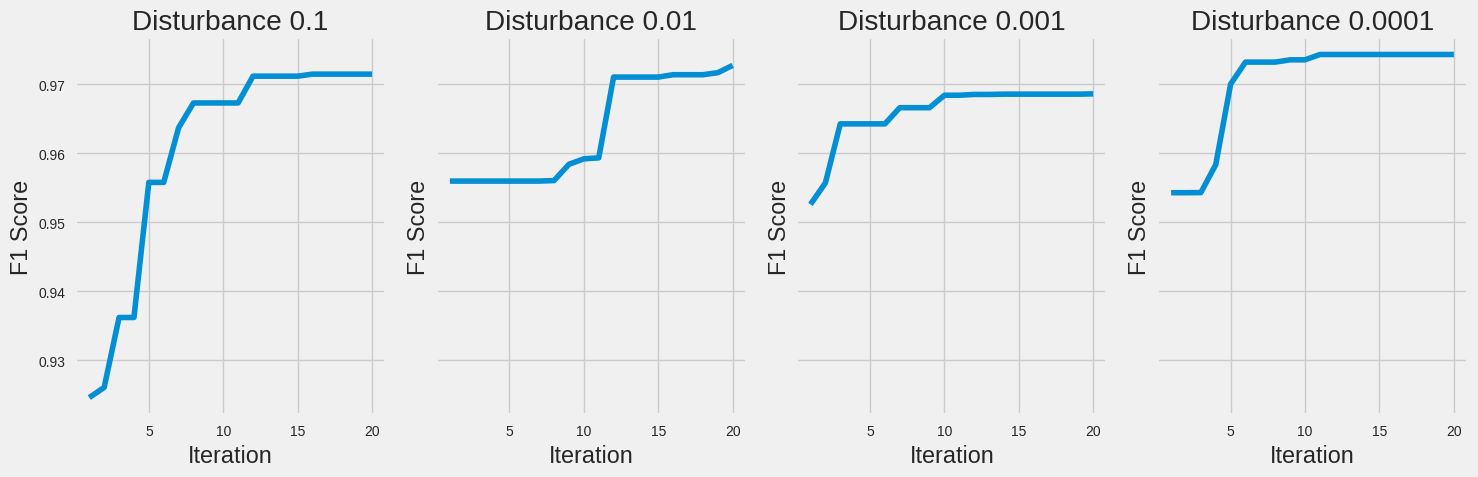

In [105]:
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

# Create subplots
fig, axs = plt.subplots(1, len(delta_values), figsize=(15, 5), sharey=True)

# Plot convergence graphs for each disturbance index separately
for k,disturbance_index in enumerate(delta_values):
    axs[k].plot(range(1, maxIterations + 1), convergence_results[k, :])
    axs[k].set_xlabel('Iteration')
    axs[k].set_ylabel('F1 Score')
    axs[k].set_title(f'Disturbance {disturbance_index}')
    axs[k].grid()

    axs[k].grid(True)


plt.setp(axs, ylabel='F1 Score')
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

## Best Features

In [119]:
indices = [index for index, element in enumerate(XX[s,]) if element >= 0.5]

df_best = df.iloc[:,indices]
X_best = X.iloc[:,indices]

In [120]:
X_best.shape

(887379, 29)

In [121]:
# TRAIN VAL TEST SPLIT
X_train,X_test,y_train,y_test=train_test_split(X_best,y,test_size=0.1,shuffle=True,stratify=y,random_state=42)


from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train,y_train = rus.fit_resample(X_train,y_train)


X_train_re,X_valid_re,y_train_re,y_valid_re = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,shuffle=True,random_state=42)

In [122]:
from sklearn.tree import DecisionTreeClassifier

train_acc_hist = []
cv_acc_hist = []
test_acc_hist = []

for i in range(1,10):

  dt = DecisionTreeClassifier(max_depth=i,random_state=42)
  dt.fit(X_train_re,y_train_re)

  y_pred_train_dt = dt.predict(X_train_re)
  y_pred_cv_dt = dt.predict (X_valid_re)
  y_pred_test_dt = dt.predict(X_test)

  print('----- Depth {} ---------'.format(i))
  print('F1 Train:', f1_score(y_train_re,y_pred_train_dt,average='macro'))
  print('F1 Validation:', f1_score(y_valid_re,y_pred_cv_dt,average='macro'))
  print('Train acc:', accuracy_score(y_train_re,y_pred_train_dt))
  print('Validation acc:', accuracy_score(y_valid_re,y_pred_cv_dt))

  train_acc_hist.append(f1_score(y_train_re,y_pred_train_dt,average='macro'))
  cv_acc_hist.append(f1_score(y_valid_re,y_pred_cv_dt,average='macro'))
  test_acc_hist.append(f1_score(y_test,y_pred_test_dt,average='macro'))

----- Depth 1 ---------
F1 Train: 0.7470292155541027
F1 Validation: 0.7515313043932915
Train acc: 0.7470334194381659
Validation acc: 0.7515437704322557
----- Depth 2 ---------
F1 Train: 0.883996892620813
F1 Validation: 0.8885933348675146
Train acc: 0.8842125443978043
Validation acc: 0.8887577188521613
----- Depth 3 ---------
F1 Train: 0.9097639817562857
F1 Validation: 0.9134417704363436
Train acc: 0.9097917339360672
Validation acc: 0.9134580457682528
----- Depth 4 ---------
F1 Train: 0.9302883452005577
F1 Validation: 0.9323211583758808
Train acc: 0.9305275266386825
Validation acc: 0.9325281511078823
----- Depth 5 ---------
F1 Train: 0.9449907771767261
F1 Validation: 0.9466939192412173
Train acc: 0.9450980787859219
Validation acc: 0.946785325099891
----- Depth 6 ---------
F1 Train: 0.949789058632821
F1 Validation: 0.9513973965094247
Train acc: 0.9499112043913465
Validation acc: 0.951507446422085
----- Depth 7 ---------
F1 Train: 0.9573135263943685
F1 Validation: 0.9592526449072166
Train

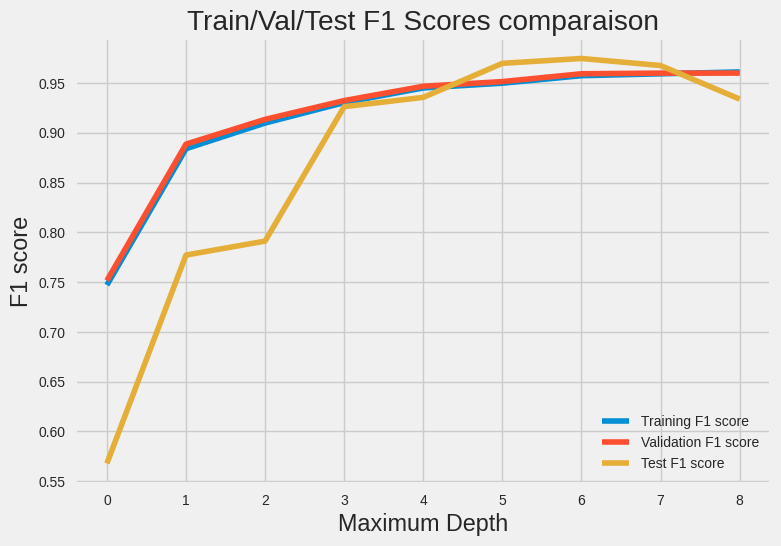

In [127]:
plt.plot(range(len(train_acc_hist)),train_acc_hist,label='Training F1 score')
plt.plot(range(len(cv_acc_hist)),cv_acc_hist,label='Validation F1 score')
plt.plot(range(len(test_acc_hist)),test_acc_hist,label='Test F1 score')
plt.xlabel('Maximum Depth')
plt.ylabel('F1 score')
plt.legend(loc='lower right')
plt.title('Train/Val/Test F1 Scores comparaison')

plt.show()

In [123]:
dt = DecisionTreeClassifier(max_depth=10,random_state=42)
dt.fit(X_train_re,y_train_re)

y_pred_train_dt = dt.predict(X_train_re)
y_pred_cv_dt = dt.predict (X_valid_re)


print('F1 Train:', f1_score(y_train_re,y_pred_train_dt,average='macro'))
print('F1 Validation:', f1_score(y_valid_re,y_pred_cv_dt,average='macro'))
print('--------------')
print('Train acc:', accuracy_score(y_train_re,y_pred_train_dt))
print('Validation acc:', accuracy_score(y_valid_re,y_pred_cv_dt))

F1 Train: 0.9624487808867126
F1 Validation: 0.9600919841153108
--------------
Train acc: 0.9624939457539554
Validation acc: 0.9601343988376316


In [128]:
y_pred_test_dt = dt.predict(X_test)

print('F1 Test:', f1_score(y_test,y_pred_test_dt,average='macro'))

F1 Test: 0.9569938261438307


In [125]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

# Confusion matrix and report

conf_mat = confusion_matrix(y_test,y_pred_test_dt)
print('Confusion Matrix:',conf_mat)
print('---------------')

report = classification_report(y_test,y_pred_test_dt)
print(report)

Confusion Matrix: [[ 5685   433]
 [  556 82064]]
---------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6118
           1       0.99      0.99      0.99     82620

    accuracy                           0.99     88738
   macro avg       0.95      0.96      0.96     88738
weighted avg       0.99      0.99      0.99     88738



[Text(0.5, 9.222222222222195, 'Predictions'),
 Text(34.72222222222222, 0.5, 'Actual values')]

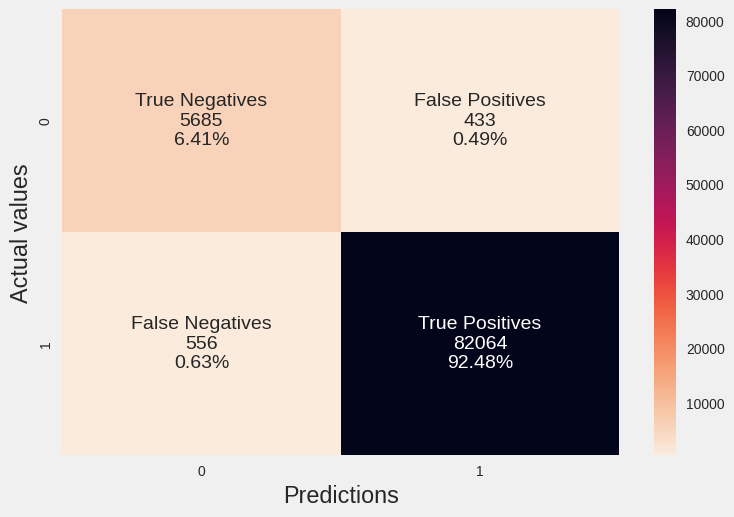

In [129]:
import seaborn as sns

group_names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat.flatten() / np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', cmap='rocket_r')
ax.set(xlabel="Predictions",ylabel="Actual values")

# Other features selection approaches

## Random feature elimination (RFE)

In [130]:
# TRAIN VAL TEST SPLIT
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,shuffle=True,stratify=y,random_state=42)


from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train,y_train = rus.fit_resample(X_train,y_train)


X_train_re,X_valid_re,y_train_re,y_valid_re = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,shuffle=True,random_state=42)

In [131]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import sklearn.svm
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier (you can use any other classifier as well)
#clf = sklearn.svm.SVC(C=0.1,kernel='linear',random_state=40)
clf = DecisionTreeClassifier(max_depth=10,random_state=42)


# Specify the number of features to select (e.g., 10)
n_features_to_select = 15

# Create RFE object and fit the model
rfe = RFE(estimator=clf, n_features_to_select=n_features_to_select)
rfe.fit(X_train_re, y_train_re)

# Get the selected features
selected_features = X.columns[rfe.support_]


print(selected_features)

Index(['funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'issue_d',
       'url', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d'],
      dtype='object')


In [132]:
print(X_train_re[selected_features].shape)

(99104, 15)


In [133]:
# Train the classifier with the selected features
clf.fit(X_train_re[selected_features], y_train_re)

# Make predictions on the test set
y_pred_rfe = clf.predict(X_test[selected_features])

# Calculate accuracy
accuracy = f1_score(y_test, y_pred_rfe,average="macro")
print("Accuracy after RFE with ",n_features_to_select," features:",accuracy)

Accuracy after RFE with  15  features: 0.9565710573037394


In [134]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

# Confusion matrix and report

conf_mat = confusion_matrix(y_test,y_pred_rfe,
                            #normalize='all'
                            )
print('Confusion Matrix:',conf_mat)
print('---------------')

report = classification_report(y_test,y_pred_rfe)
print(report)

Confusion Matrix: [[ 5750   368]
 [  642 81978]]
---------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6118
           1       1.00      0.99      0.99     82620

    accuracy                           0.99     88738
   macro avg       0.95      0.97      0.96     88738
weighted avg       0.99      0.99      0.99     88738



## Variance thresholding

In [145]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=10,random_state=42)


# Specify the threshold for variance (remove features below this threshold)
threshold_value = 0.7

# Create VarianceThreshold object and fit the model
variance_selector = VarianceThreshold(threshold=threshold_value)
X_train_selected = variance_selector.fit_transform(X_train)

# Get the selected features' indices
selected_features_indices = variance_selector.get_support(indices=True)

# Filter the testing set with the selected features
X_test_selected = X_test.iloc[:, selected_features_indices]

# Train the classifier with the selected features
clf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_var = clf.predict(X_test_selected)

# Calculate accuracy
score = f1_score(y_test, y_pred_var,average="macro")
print("F1 Score:", score)

F1 Score: 0.957759722126298


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [146]:
X_train_selected.shape

(110116, 38)

In [147]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

# Confusion matrix and report

conf_mat = confusion_matrix(y_test,y_pred_var,
                            #normalize='all'
                            )
print('Confusion Matrix:',conf_mat)
print('---------------')

report = classification_report(y_test,y_pred_var)
print(report)

Confusion Matrix: [[ 5736   382]
 [  596 82024]]
---------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6118
           1       1.00      0.99      0.99     82620

    accuracy                           0.99     88738
   macro avg       0.95      0.97      0.96     88738
weighted avg       0.99      0.99      0.99     88738

